In [ ]:
!pip install pyforest
import pyforest
import warnings
warnings.filterwarnings(action='ignore',message='^internal gelsd')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14606 sha256=d37100ebf523dd9aac8e0616a1dc82b6f8fe3a1c820ab3855bfeeb0ca5a8599c
  Stored in directory: /root/.cache/pip/wheels/d5/1a/3e/6193fe1c56168f5df4aef57d8411033ba4611881135d495727
Successfully built pyforest


In [ ]:
df_raw=pd.read_csv("/content/drive/MyDrive/Data_sets/heart.csv")
df_raw.head()
df=df_raw.copy()


<IPython.core.display.Javascript object>

In [ ]:
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
def SG_EDA(df):
    print('shape of the dataset',df.shape)
    print('Columns in the data set are:', df.columns)
    print(df.info())
    print('The statical data for the given data set is ',df.describe(include='all'))
    
    return df

In [ ]:
SG_EDA(df)

shape of the dataset (918, 12)
Columns in the data set are: Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: f

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
def HeatMap(df,x=True):
        correlations = df.corr()
        ## Create color map ranging between two colors
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        fig, ax = plt.subplots(figsize=(10, 10))
        fig = sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=x, cbar_kws={"shrink": .75})
        fig.set_xticklabels(fig.get_xticklabels(), rotation = 90, fontsize = 10)
        fig.set_yticklabels(fig.get_yticklabels(), rotation = 0, fontsize = 10)
        plt.tight_layout()
        plt.show()

<ipython-input-8-bc687fae5bd0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

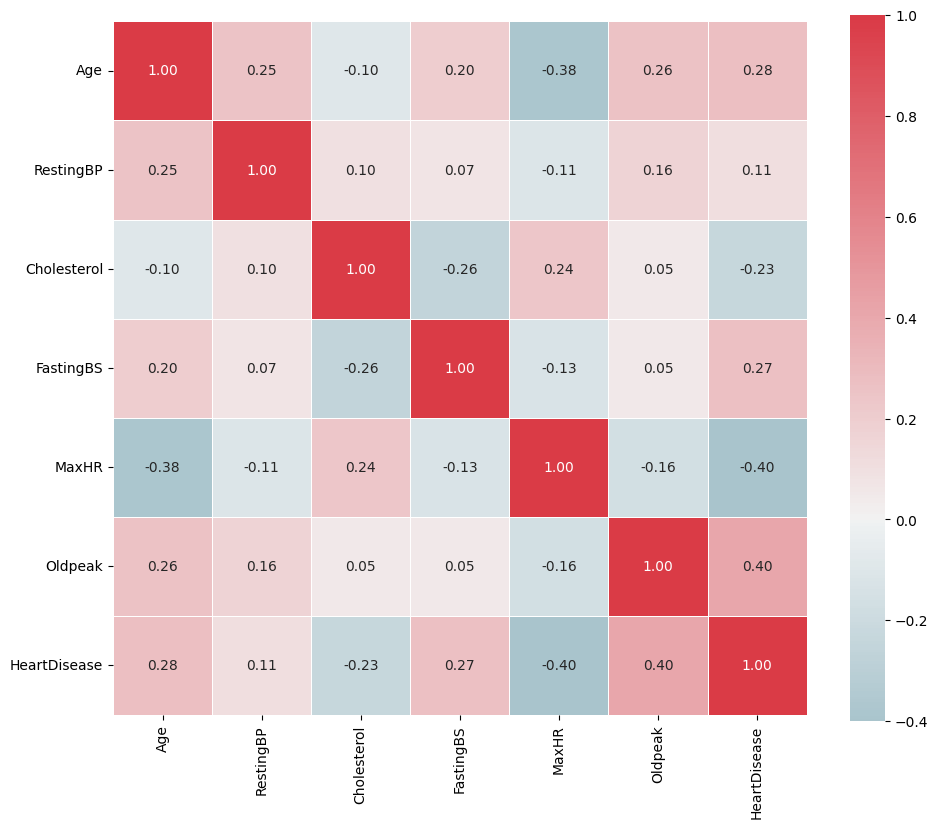

In [ ]:
HeatMap(df,x=True)


In [ ]:
from sklearn.model_selection import train_test_split
x,y = train_test_split(df,test_size = 0.15, random_state=101)

In [ ]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 6.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 9.0 MB/s eta 0:00:00
  

In [ ]:
from pycaret.classification import *
exp_reg101 = setup(data = x, target = 'HeartDisease',train_size=0.8,imputation_type='iterative',
                   iterative_imputation_iters=10,normalize_method = 'minmax',
                   transformation=True, feature_selection=True,fold= 2 ,
                  fold_shuffle=True,n_jobs=-1,session_id=123,categorical_features=['Sex','ChestPainType','RestingECG', 'ExerciseAngina','ST_Slope'],
                  fix_imbalance=True)

,Description,Value
0,Session id,123
1,Target,HeartDisease
2,Target type,Binary
3,Original data shape,"(780, 12)"
4,Transformed data shape,"(842, 3)"
5,Transformed train set shape,"(686, 3)"
6,Transformed test set shape,"(156, 3)"
7,Ordinal features,2
8,Numeric features,6
9,Categorical features,5


In [ ]:
best = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7051,0.7594,0.6794,0.7658,0.7172,0.4108,0.4174,2.7900
ridge,Ridge Classifier,0.7019,0.0000,0.6678,0.7696,0.7109,0.4056,0.4147,0.6700
lda,Linear Discriminant Analysis,0.6987,0.7624,0.6561,0.7693,0.7053,0.4004,0.4091,0.4300
qda,Quadratic Discriminant Analysis,0.6939,0.7894,0.5774,0.8217,0.6731,0.4009,0.4274,0.4150
gbc,Gradient Boosting Classifier,0.6923,0.7242,0.7172,0.7231,0.7195,0.3785,0.3793,0.6400
lightgbm,Light Gradient Boosting Machine,0.6747,0.7191,0.6882,0.7101,0.6988,0.3454,0.3457,0.9300
knn,K Neighbors Classifier,0.6683,0.7159,0.6532,0.7197,0.6836,0.3366,0.3397,0.5900
nb,Naive Bayes,0.6571,0.7720,0.5192,0.7945,0.6188,0.3331,0.3631,0.8100
xgboost,Extreme Gradient Boosting,0.6571,0.7096,0.6706,0.6970,0.6825,0.3099,0.3113,0.6950
rf,Random Forest Classifier,0.6554,0.7212,0.6327,0.7103,0.6686,0.3123,0.3152,0.8200


Processing:   0%|          | 0/65 [00:00<?, ?it/s]